# Testing Outsourced Code

In [227]:
import tensorflow_probability as tfp
import tensorflow as tf
tfd = tfp.distributions
import numpy as np
import matplotlib.pyplot as plt
from tqdm import tqdm

from timeit import timeit

np.random.seed(42)
tf.random.set_seed(42)

In [234]:
from importlib import reload  

import topicflow.utils  as tp_utils
import topicflow.data   as tp_data
import topicflow.models as tp_models

tp_utils  = reload(tp_utils)
tp_data   = reload(tp_data)
tp_models = reload(tp_models)

## Settings

In [210]:
N_docs = 1000
sqrt_N_vocab = 5
N_words = 100

N_vocab = int(sqrt_N_vocab**2)

## Generating Data

In [211]:
data_fixed_N  = tp_data.squareLDDocuments(
    N_docs=N_docs, 
    sqrt_N_vocab=sqrt_N_vocab, 
    N_words_rate=N_words)
data_random_N = tp_data.squareLDDocuments(
    N_docs=N_docs, 
    sqrt_N_vocab=sqrt_N_vocab, 
    N_words_rate=N_words)

## Modelling

### Fixed $I_d=N, \ \forall \ d\in \{1, \, \dots, D\}$:

In [212]:
Theta, Pi, _, _, W_DId = data_fixed_N.extract_params()

Presenting documents [102 435 860 270 106  71 700  20 614 121]


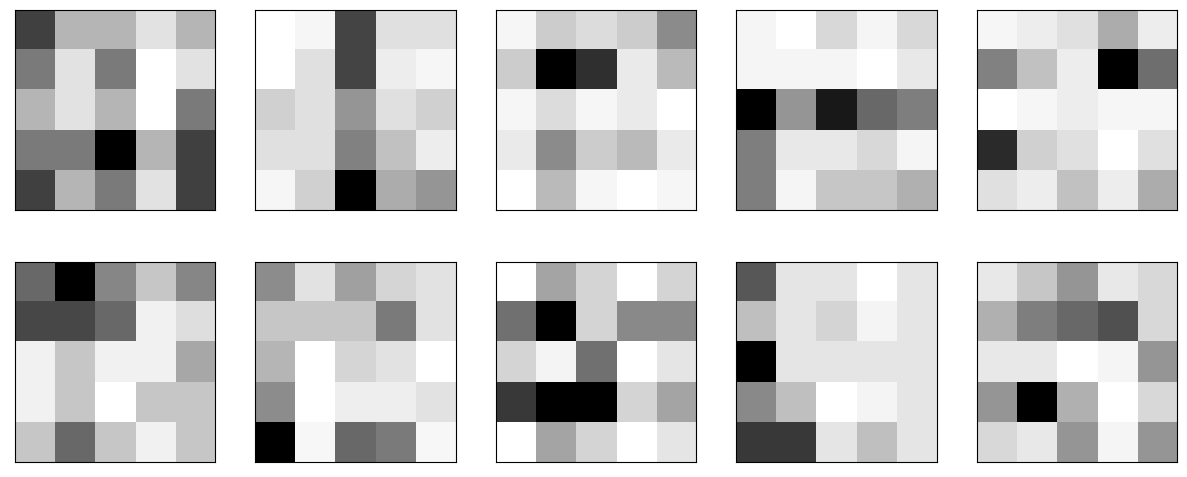

In [213]:
fig = tp_utils.visualize_random_docs(W_DId, sqrt_N_vocab)

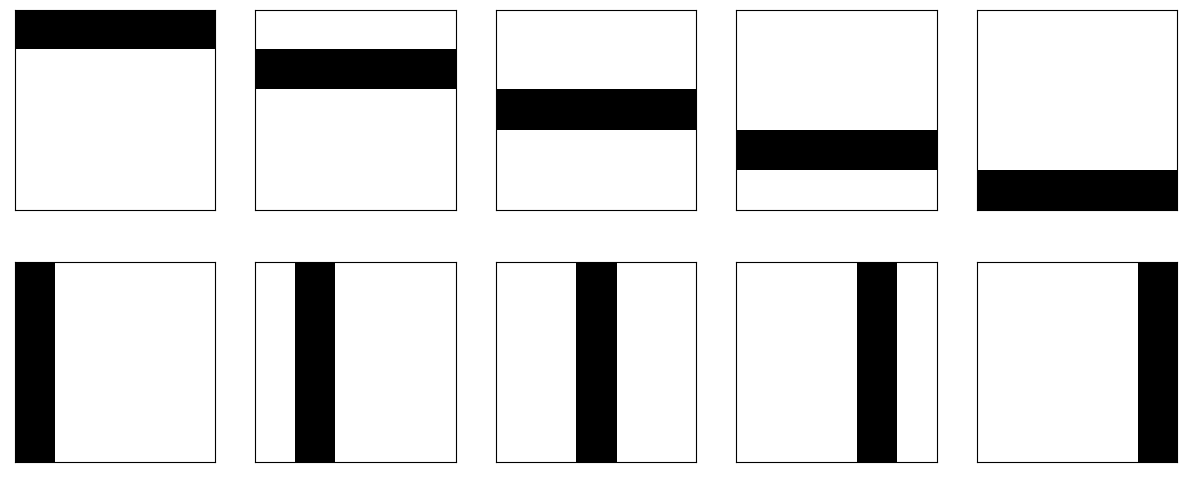

In [214]:
fig = tp_utils.visualize_topics(Theta, 2, sqrt_N_vocab)

In [215]:
model_fixedN = tp_models.LDA(N_topics=2*sqrt_N_vocab)
model_fixedN.fit(W_DId)

100%|██████████| 200/200 [00:09<00:00, 21.23it/s]


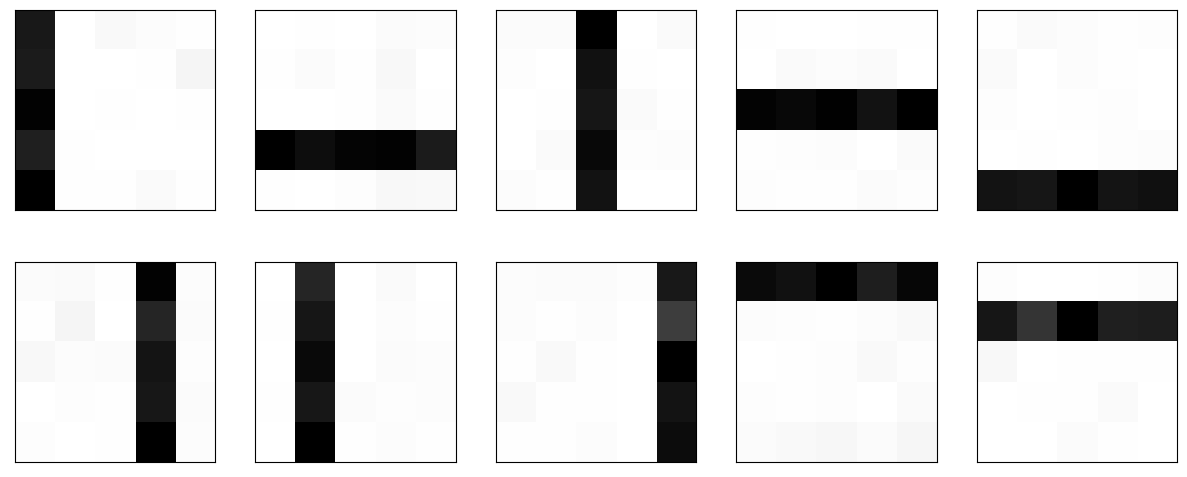

In [235]:
fig = tp_utils.visualize_topics(model_fixedN.Theta, 2, sqrt_N_vocab)

### Random $I_d$:

In [217]:
Theta, Pi, _, _, W_DId = data_random_N.extract_params()

Presenting documents [362 988 548 551 825 224 390 465 363 167]


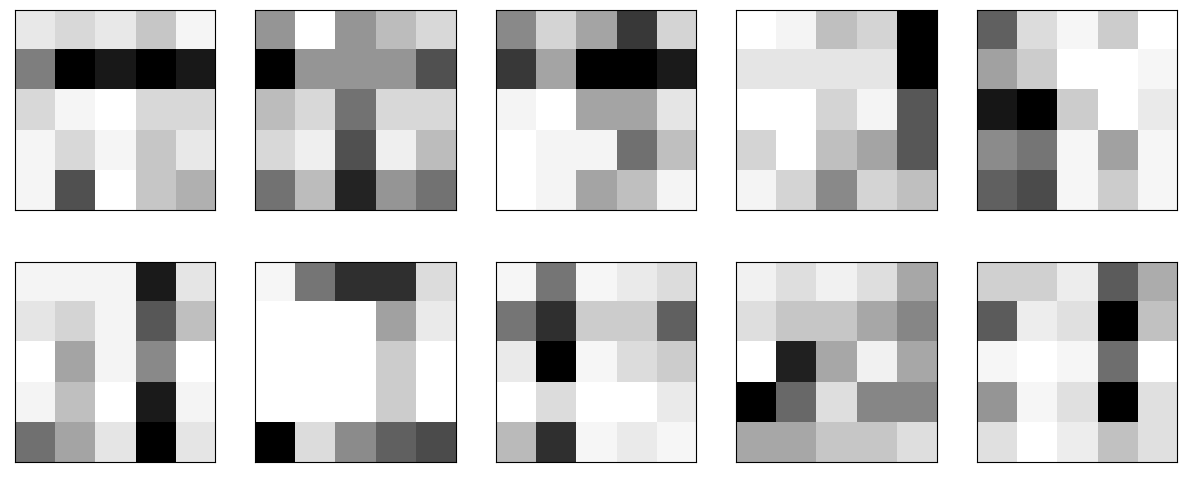

In [218]:
fig = tp_utils.visualize_random_docs(W_DId, sqrt_N_vocab)

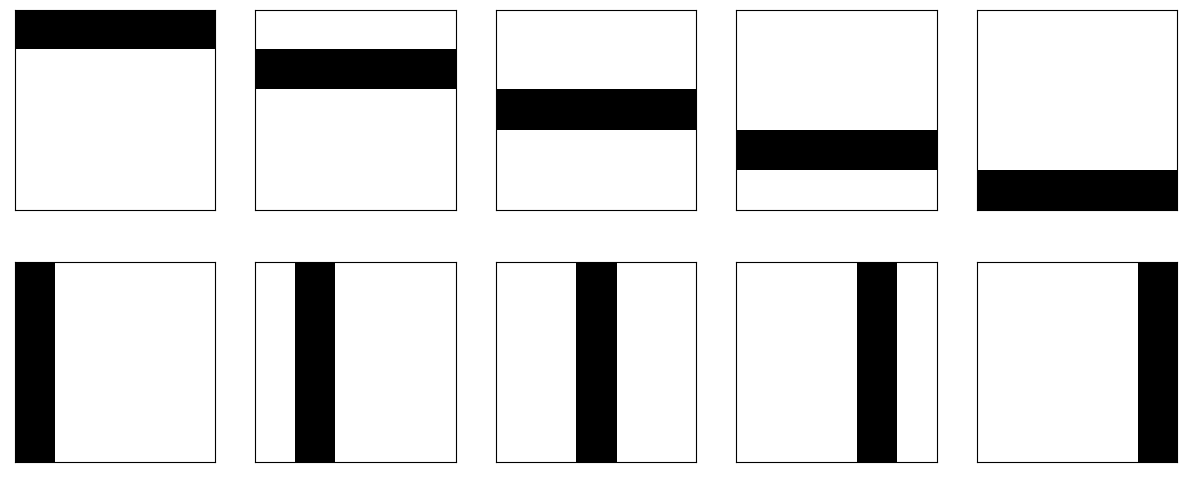

In [219]:
fig = tp_utils.visualize_topics(Theta, 2, sqrt_N_vocab)

In [245]:
model_randomN = tp_models.LDA(N_topics=2*sqrt_N_vocab-5)
model_randomN.fit(W_DId)

100%|██████████| 200/200 [00:07<00:00, 26.15it/s]


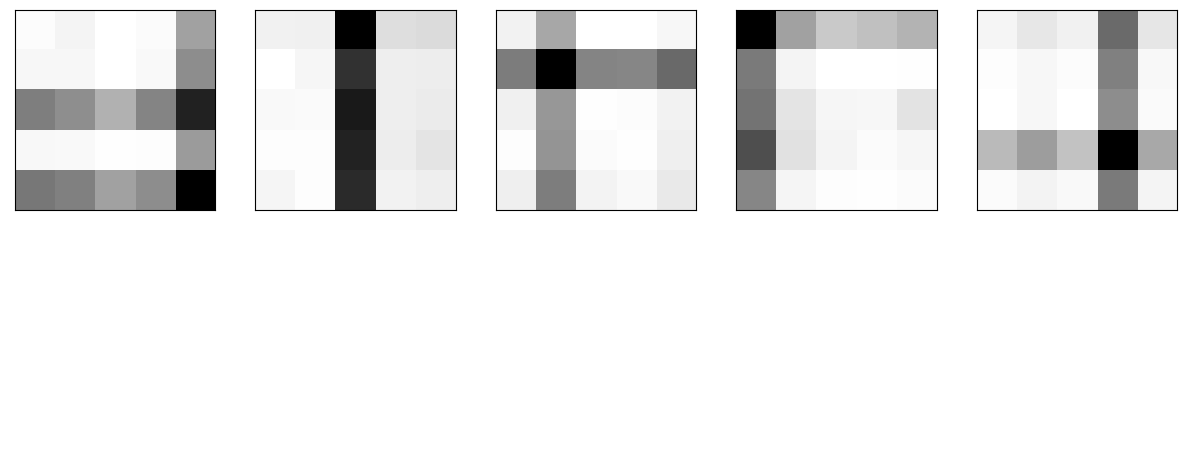

In [246]:
fig = tp_utils.visualize_topics(model_randomN.Theta, 2, sqrt_N_vocab)

## Further Tests

In [258]:
data_larger = tp_data.squareLDDocuments(1000, 10, N_words_rate=100)
Theta, Pi, _, _, W_DId = data_larger.extract_params()

In [259]:
model_larger = tp_models.LDA(N_topics=2*7)
model_larger.fit(W_DId)

100%|██████████| 200/200 [00:32<00:00,  6.20it/s]


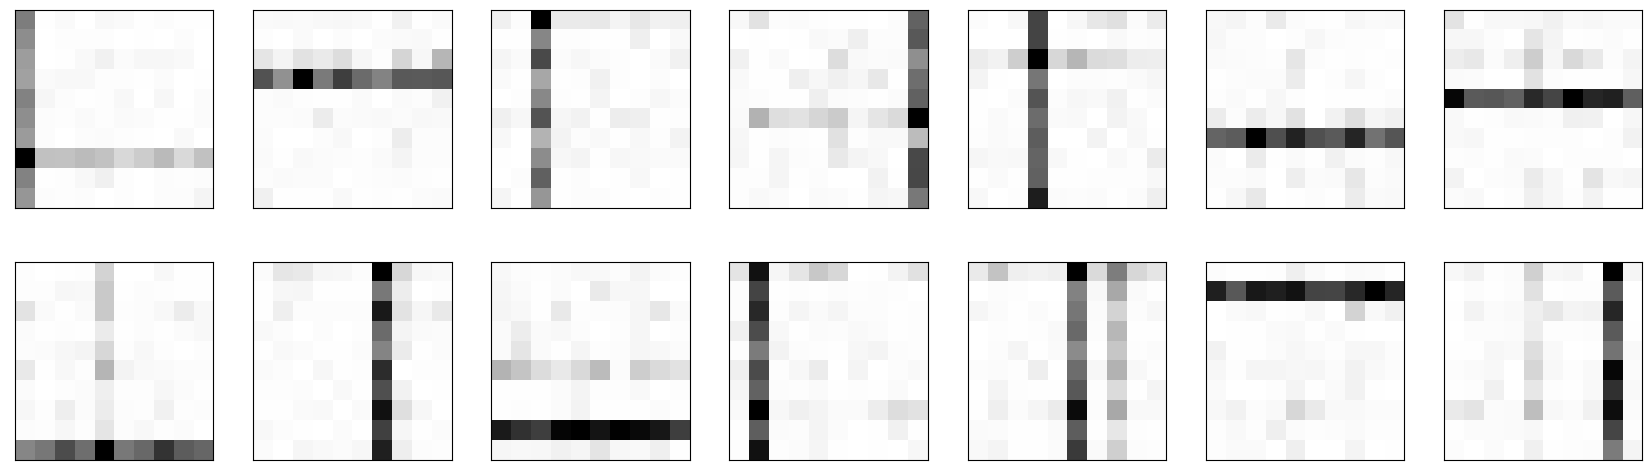

In [260]:
fig = tp_utils.visualize_topics(model_larger.Theta, 2, 7)